In [ ]:

#  This NoteBook contains code to run MLP against the Iris data set
#
#  Generally this works. I did not finish fixing all of the outputs.
#


#  Step 00: Setup

In [ ]:

#  Largely code to control how print statements and related work
#

%load_ext autoreload
%autoreload 2

%xmode Minimal


#  Setting display options 
#
import pandas as pd
pd.set_option("display.width", 640)
   #
import numpy as np
np.set_printoptions(edgeitems = 30, linewidth = 100000, 
   formatter = dict(float = lambda x: "%.3g" % x))

#  Sets horizontal scroll for wide outputs
#
from IPython.display import display, HTML
display(HTML(""))

   ###
    
from tabulate import tabulate
#
#  How to use tabulate-
#
#  l_result = [{ "col1": 20, "col2": 30}]
#  #
#  print(tabulate(l_result, headers='keys', tablefmt='psql', showindex=False))

print("--")


#  Step A1: Iris Data load, encode

In [ ]:

#  Read the Iris data into a Pandas Dataframe
#
#     Features
#     1. sepal length in cm
#     2. sepal width in cm
#     3. petal length in cm
#     4. petal width in cm
#     5. class: 
#        Iris-setosa
#        Iris-versicolour
#        Iris-virginica
#
#  To convert class into a numeric, we use sklearn.preprocessing.LabelEncoder
#  See,
#     https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn
#

from sklearn.preprocessing import LabelEncoder

my_le = LabelEncoder()
   #
l_folder = "20_Data"
l_file   = "11_iris.data.txt"


pd_iris  = pd.read_csv((l_folder + "/" + l_file), header = 0, sep = ",",
   names = ["sl", "sw", "pl", "pw", "class"],
   dtype = {"sl": "float", "sw": "float", "pl": "float", "pw": "float", "class": "string"} )
      #
pd_iris["class_encoded"]  =  my_le.fit_transform(pd_iris["class"])
   #
pd_iris = pd_iris.drop(["class"], axis = 1)
    
    
#  Pandas.Dataframe.sample() returns a randomized set of rows, versus
#  say head(), which always returns the first n ..
#
print(tabulate(pd_iris.sample(5), headers='keys', tablefmt='psql', showindex=False))
print("Number of rows: %d" % (len(pd_iris)))

print("--")

#  Sample output,
#
#     +------+------+------+------+-----------------+
#     |   sl |   sw |   pl |   pw |   class_encoded |
#     |------+------+------+------+-----------------|
#     |  5.5 |  2.4 |  3.8 |  1.1 |               1 |
#     |  6.4 |  3.2 |  4.5 |  1.5 |               1 |
#     |  6.8 |  3.2 |  5.9 |  2.3 |               2 |
#     |  6.7 |  3.3 |  5.7 |  2.1 |               2 |
#     |  5.5 |  2.6 |  4.4 |  1.2 |               1 |
#     +------+------+------+------+-----------------+
#     Number of rows: 149


In [ ]:

#  Split data into training and test.
#  Convert the data into numpy arrays, since the ml code we use later expect that.
#  We only want two of the classes, 1 and 2.
#  And we only want columns 2 and 3.
#
#     Why this data ?  It was harder to predict; see the plot below.
#


import numpy as np
from sklearn.model_selection import train_test_split

np_iris = {}
   #
np_iris["train"], np_iris["test"] = train_test_split(pd_iris.to_numpy(),              #  random_state calls to shuffle the data,
   test_size = 0.20, random_state = 40)                                               #    which had arrived sorted


#  Filter out given labels
#
np_iris["train_f"] = np_iris["train"][ ( np_iris["train"][:, -1] > 0) & ( np_iris["train"][:, -1] < 3) ]
np_iris["test_f" ] = np_iris["test" ][ ( np_iris["test" ][:, -1] > 0) & ( np_iris["test" ][:, -1] < 3) ]


#  Slicing only given columns
#
np_iris["train_fs"] = np_iris["train_f"][:, [2 ,3, 4]]
np_iris["test_fs" ] = np_iris["test_f" ][:, [2, 3, 4]] 


#  Outputs for confirmation
#
print("Number of total                 rows... %d   Training rows: %d   Test rows: %d" %
  (len(pd_iris), len(np_iris["train"]), len(np_iris["test"])) )
print()
print("Number of total filtered/sliced rows... %d   Training rows: %d   Test rows: %d" %
  ( len(np_iris["train_fs"]) + len(np_iris["test_fs"]),
    len(np_iris["train_fs"]), len(np_iris["test_fs"]) ) ) 
print()

print("Train data:")
print("%s" % (np_iris["train_fs"][0:5]))
print()
print("Test  data:")
print("%s" % (np_iris["test_fs" ][0:5]))
print()
   #
print("--")

#  Sample output
#
#     Number of total                 rows... 149   Training rows: 119   Test rows: 30
#     
#     Number of total filtered/sliced rows... 100   Training rows: 78   Test rows: 22
#     
#     Train data:
#     [[4.7 1.4 1]
#      [5.8 1.6 2]
#      [5.1 2.4 2]
#      [4.4 1.3 1]
#      [5.6 2.1 2]]
#     
#     Test  data:
#     [[4.1 1 1]
#      [5.5 1.8 2]
#      [6.9 2.3 2]
#      [4.4 1.2 1]
#      [5.6 2.4 2]]


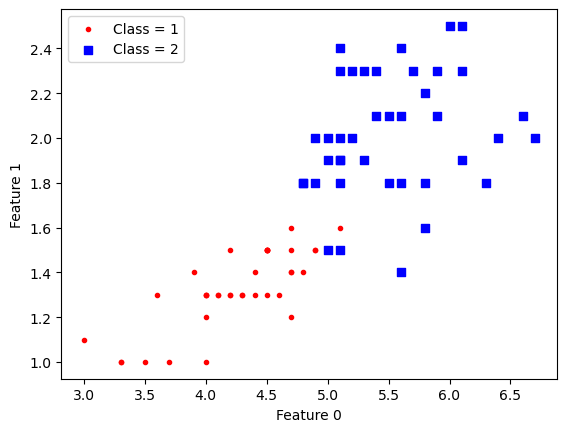

In [32]:

#  Plot of just two features from the two class data set
#

import matplotlib.pyplot as plt


plt.scatter(np_iris["train_fs"][np_iris["train_fs"][:, -1]==1][:, 0], np_iris["train_fs"][np_iris["train_fs"][:, -1]==1][:, 1], c = "red"  , label = "Class = 1", marker = ".")
plt.scatter(np_iris["train_fs"][np_iris["train_fs"][:, -1]==2][:, 0], np_iris["train_fs"][np_iris["train_fs"][:, -1]==2][:, 1], c = "blue" , label = "Class = 2", marker = ",")
    
plt.legend()
   #
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()



<div> 
<img src="./01_Images/09_Results_Chart.png" alt="Drawing" style="width: 800px;"/>  
</div>

#  Step A2: Iris Data train, test

In [29]:

#  Train the neural network on Iris data
#
#  From PDL Pg 186
#

#  The following variables are in scope ..
#
#     np_iris["train_fs"]
#     np_iris["test_fs" ]
#
#        ^^^^  cols 0 and 1 are features, col 2 (-1) is the label
#

import pickle
from sklearn.neural_network import MLPClassifier


l_clf = MLPClassifier(
   hidden_layer_sizes = (3, 2),
   activation         = "logistic",           #  aka, sigmoid
   solver             = "adam",
   tol                = 1e-9,
   max_iter           = 50000,                #  5000 (book) would not settle
   verbose            = False,
   )


l_clf.fit(np_iris["train_fs"][:, [0, 1]], np_iris["train_fs"][:, -1])
   #
l_probability = l_clf.predict_proba(np_iris["test_fs"][:, [0, 1]])
l_score       = l_clf.score(np_iris["test_fs"][:, [0, 1]], np_iris["test_fs"][:, -1]) 


#  Saving this model for future scoring
#
l_w12         = l_clf.coefs_[0]
l_w23         = l_clf.coefs_[1]
l_w34         = l_clf.coefs_[2]
l_b1          = l_clf.intercepts_[0]
l_b2          = l_clf.intercepts_[1]
l_b3          = l_clf.intercepts_[2]
   #
l_weights     = [l_w12, l_b1, l_w23, l_b2, l_w34, l_b3]
   #
pickle.dump(l_weights, open("./20_Data/48_IrisWeights.pkl", "wb"))


   ###
    
    
#  Our actual data is class 1 and 2.
#  Having two values only, this model labels these as zero and 1.
#  In the print statement below, we adjust that for display only.
#
print()
print("Test results:")
print("   Overall score: %0.5f %%" % (l_score * 100))
print()
print("   Sample   Actual Class   Predicted Class   Probability")
print("   ======   ============   ===============   ===========")
for i in range(len(np_iris["test_fs"][:, -1])):
   l_actualclass  = 1 if l_probability[i, 1] < 0.5 else 2
   l_predictclass = int(np_iris["test_fs"][:, -1][i])
   print("    %03d      %d              %d                 %08.4f %%" % (i, l_predictclass, l_actualclass, l_probability[i, l_predictclass - 1] * 100))
print()

print("--")

#  Sample output
#

#     Test results:
#        Overall score: 95.45455 %
#     
#        Sample   Actual Class   Predicted Class   Probability
#        ======   ============   ===============   ===========
#         000      1              1                 100.0000 %
#         001      2              2                 099.9307 %
#         002      2              2                 100.0000 %
#         003      1              1                 100.0000 %
#         004      2              2                 100.0000 %
#         005      1              1                 100.0000 %
#         006      1              1                 100.0000 %
#         007      1              1                 100.0000 %
#         008      1              1                 100.0000 %
#         009      2              2                 098.8012 %
#         010      1              1                 100.0000 %
#         011      2              2                 100.0000 %
#         012      2              2                 100.0000 %
#         013      2              2                 100.0000 %
#         014      1              1                 099.9992 %
#         015      1              1                 100.0000 %
#         016      2              2                 100.0000 %
#         017      2              1                 000.0000 %
#         018      1              1                 100.0000 %
#         019      1              1                 100.0000 %
#         020      2              2                 100.0000 %
#         021      1              1                 100.0000 %


[[1 1.9e-05]
 [3.76e-06 1]
 [1.81e-12 1]
 [1 1.93e-05]
 [2.38e-05 1]
 [1 1.89e-05]
 [1 1.89e-05]
 [1 1.95e-05]
 [1 1.94e-05]
 [0.00426 0.996]
 [1 1.89e-05]
 [2.37e-05 1]
 [1.66e-05 1]
 [1.07e-14 1]
 [0.0407 0.959]
 [1 1.89e-05]
 [2e-05 1]
 [1 2.78e-05]
 [1 1.89e-05]
 [1 1.89e-05]
 [1.96e-12 1]
 [1 1.89e-05]]

Test results:
   Overall score: 90.90909 %

   Sample   Actual Class   Predicted Class   Probability
   ======   ============   ===============   ===========
    000      1              1                 099.9981 %
    001      2              2                 099.9996 %
    002      2              2                 100.0000 %
    003      1              1                 099.9981 %
    004      2              2                 099.9976 %
    005      1              1                 099.9981 %
    006      1              1                 099.9981 %
    007      1              1                 099.9980 %
    008      1              1                 099.9981 %
    009      2    

In [30]:

#  Having written the model above to disk, read and use to score
#
#  From PDL Pg 184
#     There are some things below I did not fix yet
#

import pickle


def f_sigmoid(i_arg1):
   return 1.0 / (1.0 + np.exp(-i_arg1))


def f_evaluate(i_arg1, i_weights):
    
   i_data  = i_arg1[:, [0, 1]]
   i_label = i_arg1[:, -1]
    
   l_w12, l_b1, l_w23, l_b2, l_w34, l_b3 = i_weights
      #
   l_nc = l_nw = 0

   l_prob = np.zeros(len(i_label))
      #
   for i in range(len(i_label)):
      l_a1 = f_sigmoid(np.dot(i_data[i], l_w12) + l_b1)
      l_a2 = f_sigmoid(np.dot(l_a1, l_w23) + l_b2)
         #
      l_prob[i] = f_sigmoid(np.dot(l_a2, l_w34) + l_b3)
         #
      l_tmp = 0 if l_prob[i] < 0.5 else 1
         #
      if (l_tmp == i_label[i]):
         l_nc += 1
      else:
         l_nw += 1
   return [float(l_nc) / float(l_nc + l_nw), l_prob]


      ###
    

l_weights = pickle.load(open("./20_Data/48_IrisWeights.pkl", "rb"))
   #
l_score, l_probability = f_evaluate(np_iris["test_fs"],  l_weights)


   ###
    
    
print(l_score)

    
    
#  Our actual data is class 1 and 2.
#  Having two values only, this model labels these as zero and 1.
#  In the print statement below, we adjust that for display only.
#
print()
print("Test results:")
print("   Overall score: %0.5f %%" % (l_score * 100))
print()
print("   Sample   Actual Class   Predicted Class   Probability of being Class 2")
print("   ======   ============   ===============   ============================")
for i in range(len(l_probability)):
   l_prob = 0 if (l_probability[i] < 0.5) else 1
   print("           %03d      %d                %d        %08.4f %%" % (i, np_iris["test_fs"][:, -1][i], l_prob + 1, l_probability[i] * 100))
print()

print("--")

#  Sample data
#
#     Test results:
#        Overall score: 0.00000 %
#     
#        Sample   Actual Class   Predicted Class   Probability of being Class 2
#        ======   ============   ===============   ============================
#                000      1                1        000.0000 %
#                001      2                2        099.9978 %
#                002      2                2        100.0000 %
#                003      1                1        000.0000 %
#                004      2                2        100.0000 %
#                005      1                1        000.0000 %
#                006      1                1        000.0000 %
#                007      1                1        000.0000 %
#                008      1                1        000.0000 %
#                009      2                2        097.7351 %
#                010      1                1        000.0000 %
#                011      2                2        100.0000 %
#                012      2                2        100.0000 %
#                013      2                2        100.0000 %
#                014      1                1        000.0001 %
#                015      1                1        000.0000 %
#                016      2                2        100.0000 %
#                017      2                1        000.0000 %
#                018      1                1        000.0000 %
#                019      1                1        000.0000 %
#                020      2                2        100.0000 %
#                021      1                1        000.0000 %


0.045454545454545456

Test results:
   Overall score: 4.54545 %

   Sample   Actual Class   Predicted Class   Probability of being Class 2
   ======   ============   ===============   ============================
           000      1                1        000.0019 %
           001      2                2        099.9996 %
           002      2                2        100.0000 %
           003      1                1        000.0019 %
           004      2                2        099.9976 %
           005      1                1        000.0019 %
           006      1                1        000.0019 %
           007      1                1        000.0020 %
           008      1                1        000.0019 %
           009      2                2        099.5736 %
           010      1                1        000.0019 %
           011      2                2        099.9976 %
           012      2                2        099.9983 %
           013      2                2        

In [ ]:

[[1 1.9e-05]
 [3.76e-06 1]
 [1.81e-12 1]
 [1 1.93e-05]
 [2.38e-05 1]
 [1 1.89e-05]
 [1 1.89e-05]
 [1 1.95e-05]
 [1 1.94e-05]
 [0.00426 0.996]
 [1 1.89e-05]
 [2.37e-05 1]
 [1.66e-05 1]
 [1.07e-14 1]
 [0.0407 0.959]
 [1 1.89e-05]
 [2e-05 1]
 [1 2.78e-05]
 [1 1.89e-05]
 [1 1.89e-05]
 [1.96e-12 1]
 [1 1.89e-05]]

[7.72e-10 1 1 1.86e-09 1 2.12e-10 2.44e-10 1.83e-10 3.01e-10 0.983 1.89e-10 1 1 1 1.99e-07 1.89e-10 1 2.68e-10 1.86e-10 1.81e-10 1 1.79e-10]


In [ ]:

#  Same as above, more rows, more columns
#
#     Model runs, outputs are broken
#

import pickle
from sklearn.neural_network import MLPClassifier


l_clf = MLPClassifier(
   hidden_layer_sizes = (8, 4),
   activation         = "logistic",
   solver             = "adam",
   tol                = 1e-9,
   max_iter           = 80000,                #  5000 (book) would not settle
   verbose            = False,
   )


l_clf.fit(np_iris["train"][:, 0:3], np_iris["train"][:, -1])

l_probability = l_clf.predict_proba(np_iris["test"][:, 0:3])
l_score       = l_clf.score(np_iris["test"][:, 0:3], np_iris["test"][:, -1]) 


print(l_probability)
print(l_score)

print("--")

   ###
    
#  Our actual data is class 1 and 2.
#  Having two values only, this model labels these as zero and 1.
#  In the print statement below, we adjust that for display only.
#
#  print()
#  print("Test results:")
#  print("   Overall score: %0.5f %%" % (l_score * 100))
#  print()
#  print("   Sample   Actual Class   Predicted Class   Probability of being Class 1")
#  print("   ======   ============   ===============   ============================")
#  for i in range(len(np_iris["test_fs"][:, -1])):
#     l_prob = 0 if l_probability[i, 1] < 0.5 else 1
#     print("           %03d      %d                %d        %08.4f %%" % (i, np_iris["test_fs"][:, -1][i], l_prob + 1, l_probability[i, 0] * 100))
#  print()
#  
#  print("--")
